In [1]:
# huge = large
# huge['Perf'] = huge.Perf.apply(lambda x: x*10 + random.normal(100000, 200000, 1)) 
# huge['Perf'] = huge.Perf.apply(lambda x: int(x[0]))
# huge

     iter        date      time  conf   perf  runtime
0       0  2020-18-03  23:22:05     0   7529       75
1       1  2020-18-03  23:25:08     4   9606      171
2       2  2020-18-03  23:27:45     5   9873      270
3       3  2020-18-03  23:29:51     7  10720      377
4       4  2020-18-03  23:31:58     9   9250      469
..    ...         ...       ...   ...    ...      ...
228   228  2020-19-03  10:15:41   541  21940    31255
229   229  2020-19-03  10:18:29   542  18280    31437
230   230  2020-19-03  10:22:07   543  18963    31627
231   231  2020-19-03  10:25:44   545  19710    31824
232   232  2020-19-03  10:29:22   546  19560    32020

[233 rows x 6 columns]
     iter        date      time  conf    perf  runtime
0       0  2020-25-03  17:59:13     0  450706     4507
1       1  2020-25-03  18:05:42     1  533640     9843
2       2  2020-25-03  18:13:01     2  422003    14063
3       3  2020-25-03  18:18:49     3  526280    19326
4       4  2020-25-03  18:28:31     6  464960    2397

,iter,date,time,conf,perf,runtime,Gain
2,2,2020-25-03,18:13:01,2,422003,14063,6.368453


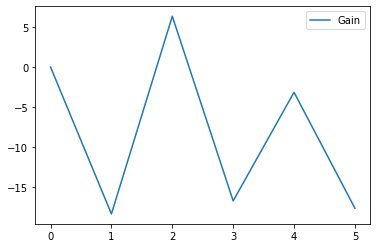

In [5]:
import matplotlib.pyplot as plt
from numpy import random 
import pandas as pd
from pdb import set_trace
from datetime import datetime

small = pd.read_csv('hadoop_small_results.csv')
small.columns = ['iter', 'date', 'time', 'conf', 'perf']
# small['runtime'] = small.perf.cumsum()
small['runtime'] = small.runtime.apply(lambda x: int(x/100))
print(small)

large = pd.read_csv('hadoop_large_results.csv', header=None)
large.columns = ['date', 'time', 'conf', 'perf']
large['iter'] = list(range(len(large)))
large = large[['iter', 'date', 'time', 'conf', 'perf']]
large['runtime'] = large.perf.cumsum()
large['runtime'] = large.runtime.apply(lambda x: int(x/100))
print(large)

i = 0
for small_val in small.runtime:
    if large.runtime.iloc[i] <= small_val:
        i += 1

large = large.iloc[:6]

baseline = large.perf.iloc[0]
print(baseline)
large['Gain'] = large.perf.apply(lambda x: (baseline-x)/baseline * 100)
large.plot(kind='line', y='Gain')
large.loc[large.perf == large.perf.min()]
